### ANN using Keras

#### Input Dataset: Churn Modelling
Available at:https://github.com/krishnaik06/Complete-Deep-Learning

#### Predict if customers are likely to exit from their banks in the future


### I. Data Load

In [1]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential                     # creates a Neural Network
from keras.layers import Dense                          # creates hidden layers
from keras.layers import LeakyReLU,PReLU,ELU            # activation function
from keras.layers import Dropout                        # regularisation parameter

In [2]:
path = r'./Churn_Modelling.csv'
dframe = pd.read_csv(path)
dframe.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### II. Initial EDA 

In [3]:
dframe.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [4]:
dframe.shape

(10000, 14)

In [5]:
dframe.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

### III. Data Cleaning

In [6]:
dframe.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
X = dframe.iloc[:,3:13]
y = dframe.iloc[:,13]

In [8]:
# Since the Geography and Gender are categorical, we will encode them by One-hot encoding.

print(dframe.Geography.value_counts())
print('\n')
print(dframe.Gender.value_counts())

geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


Male      5457
Female    4543
Name: Gender, dtype: int64


In [9]:
X = pd.concat([X, geography, gender], axis = 1)

In [10]:
X = X.drop(['Geography', 'Gender'], axis = 1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 11) (8000,)
(2000, 11) (2000,)


### IV. Feature Scaling

If the input is of various range, multiplication with weights will take time and then in Backropagation, weight updation will take time. So, convergence will be slow.

So, all the input should be standardised.

In [12]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [13]:
X_test = sc.transform(X_test)
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

### V. ANN

In [14]:
# create an empty Neural Netwrok
classifier = Sequential()

# adding first hidden layer
'''
units = 6 means 6 neurons as the output of first hidden layer
input_dim = 11 Since we have 11 feature columns so 11 
activation = relu means we will use relu act. function to trigger or not in first hidden layer
kernel_initializer = 'he_uniform' works well when act. function is 'Relu'
'''
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 11))

# adding second hidden layer
'''No need to provide the input now because it knows the o/p coming from first layer is 6'''
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

# adding third hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dropout(0.2))

# adding output layer
'''Since it's a binary classification 0/1, we will use sigmoid act. func and output units will be 1'''
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [15]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 163
Trainable params: 163
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Once the network is ready, you will be compiling it 
'''
optimizer = adam most efficient to reduce the loss.
loss = 'binary_crossentropy' in case of categorical o/p.
metrics = '[accuracy]'
'''
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100, verbose = 1)

Epoch 1/100
536/536 [==============================] - 6s 9ms/step - loss: 0.5735 - accuracy: 0.8040 - val_loss: 0.4750 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4712 - accuracy: 0.7975 - val_loss: 0.4537 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4465 - accuracy: 0.8026 - val_loss: 0.4414 - val_accuracy: 0.7974
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.4516 - accuracy: 0.7976 - val_loss: 0.4354 - val_accuracy: 0.8016
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4518 - accuracy: 0.7971 - val_loss: 0.4304 - val_accuracy: 0.8005
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4217 - accuracy: 0.8229 - val_loss: 0.4266 - val_accuracy: 0.8008
Epoch 7/100
536/536 [==============================] - 1s 3ms/step - loss: 0.4252 - accuracy: 0.8137 - val_loss: 0.4211 - val_accuracy: 0.8084

Epoch 58/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3544 - accuracy: 0.8489 - val_loss: 0.3536 - val_accuracy: 0.8595
Epoch 59/100
536/536 [==============================] - 1s 3ms/step - loss: 0.3556 - accuracy: 0.8478 - val_loss: 0.3543 - val_accuracy: 0.8565
Epoch 60/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3403 - accuracy: 0.8562 - val_loss: 0.3526 - val_accuracy: 0.8607
Epoch 61/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3433 - accuracy: 0.8589 - val_loss: 0.3527 - val_accuracy: 0.8626
Epoch 62/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3482 - accuracy: 0.8475 - val_loss: 0.3518 - val_accuracy: 0.8622
Epoch 63/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3522 - accuracy: 0.8496 - val_loss: 0.3509 - val_accuracy: 0.8614
Epoch 64/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3402 - accuracy: 0.8576 - val_loss: 0.3541 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


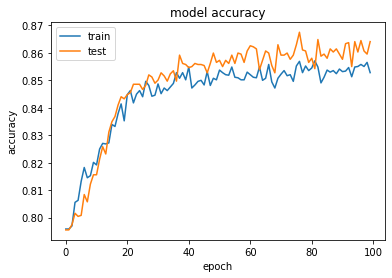

In [18]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

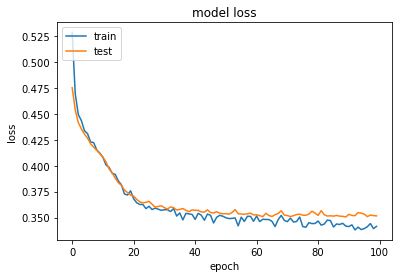

In [19]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [21]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [22]:
cm

array([[1530,   65],
       [ 206,  199]], dtype=int64)

In [23]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [24]:
score

0.8645